# Problem 2. Finding Neptune before seeing it.

https://en.wikipedia.org/wiki/Discovery_of_Neptune

The planet Neptune was mathematically predicted before it was directly observed. With a prediction by Urbain Le Verrier, telescopic observations confirming the existence of a major planet were made on the night of September 23–24, 1846, at the Berlin Observatory, by astronomer Johann Gottfried Galle (assisted by Heinrich Louis d'Arrest), working from Le Verrier's calculations. It was a sensational moment of 19th-century science, and dramatic confirmation of Newtonian gravitational theory. In François Arago's apt phrase, Le Verrier had discovered a planet "with the point of his pen".

In this home Problem, we are letting you to discover Neptune in a Sun-Uranus-Neptune system using `jax`. We will start with a single-planet practice



In [27]:
import jax.numpy as np
from jax.experimental.ode import  odeint
from jax import grad
from jax import jit
import matplotlib.pyplot as plt
import numpy as onp

## Part (a) 

Consider a two-body Uranus-Sun system. Suppose the Uranus' orbital around sun has a farthest point with $d_{US} = 3.0$. At this point, the Uranus travels at $v_U = 4.0$. Load the data from `orbit_data_2A.txt` and use `jax` to find out what is the mass of the Sun $m_S$.

The time period within which the data is simulated is between $0$ and $1.0$.


The two-body Newton's equation of motion written in an `odeint` compatible form

In [28]:
def newton_2(coord,t, m_S):
    x = coord[:2]
    y = coord[2:4]
    r = np.sqrt(x[0]**2+y[0]**2)
    ax = -(x[0]/r)*m_S/r**2
    ay = -(y[0]/r)*m_S/r**2
    return np.array([x[1], ax, y[1], ay])

Load the two-body data. The data is in the format of $(x, v_x, y, v_y)$ where $v$ is the velocity.

In [29]:
orbit_data = onp.loadtxt('./orbit_data_2A.txt')
orbit_data[0,1:]

array([3., 0., 0., 4.])

This is how the orbit looks like

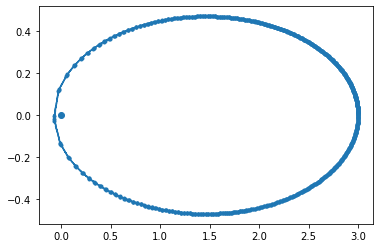

In [30]:
plt.plot(orbit_data[:,1],orbit_data[:,3],'.--')
plt.scatter([0],[0])

### Solution to (a)

In [62]:
# Solution here
# solve for m_s
d_us = 3.0
v_u = 4.0

t = orbit_data[:,0]
ms_guess = 910.0
coord = orbit_data[0,1:]

def loss(m_s): # (xt - xreal) ^2 + (yt - yreal) ^2
    return np.sum((odeint(newton_2,coord,t,m_s)[:,0].reshape(-1) - orbit_data[:,1].reshape(-1))**2 \
                  + ((odeint(newton_2,coord,t,m_s)[:,2].reshape(-1) - orbit_data[:,3].reshape(-1))**2))

In [63]:
grad_ms = jit(grad(loss,0))

lr_ms = 0.0001
count = 0

position_data = [orbit_data[:,1], orbit_data[:,3]]

Guess of Sun 910.0049
Loss 1.6294223


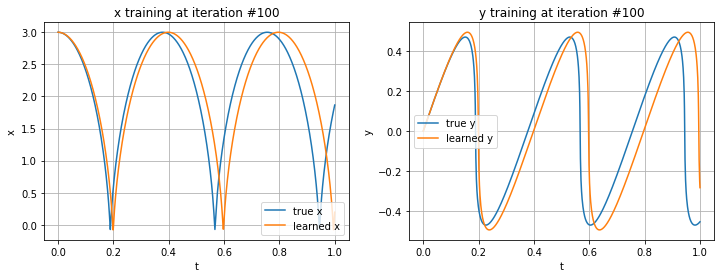

Guess of Sun 910.0049
Loss 1.6294223


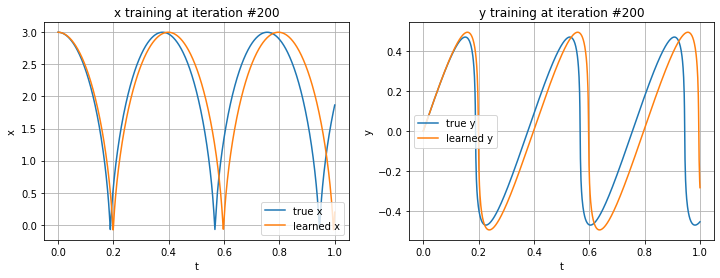

Guess of Sun 910.0049
Loss 1.6294223


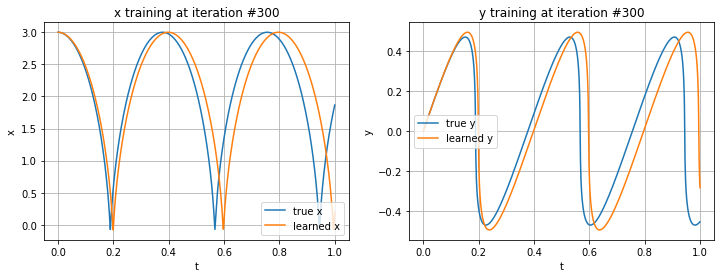

Guess of Sun 910.0049
Loss 1.6294223


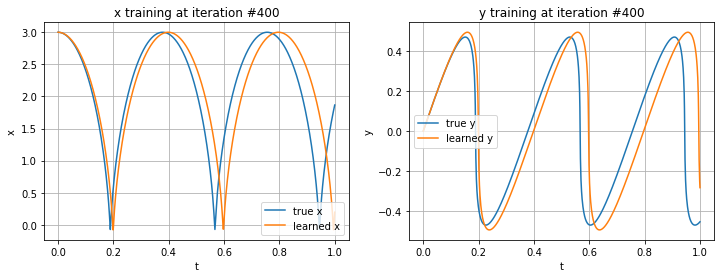

Guess of Sun 910.0049
Loss 1.6294223


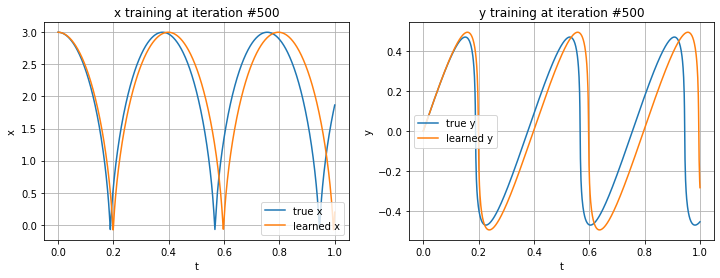

Guess of Sun 910.0049
Loss 1.6294223


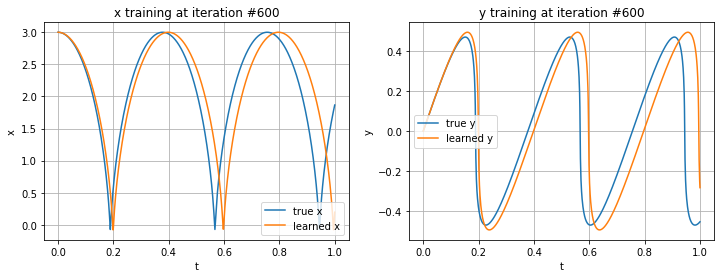

Guess of Sun 910.0049
Loss 1.6294223


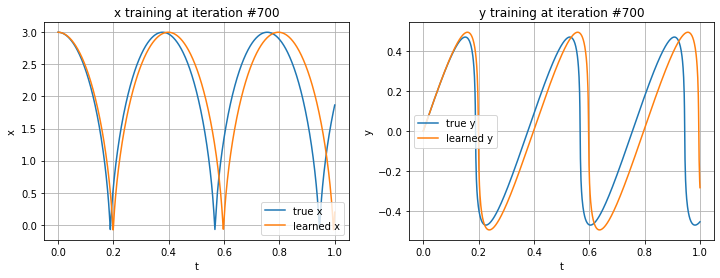

Guess of Sun 910.0049
Loss 1.6294223


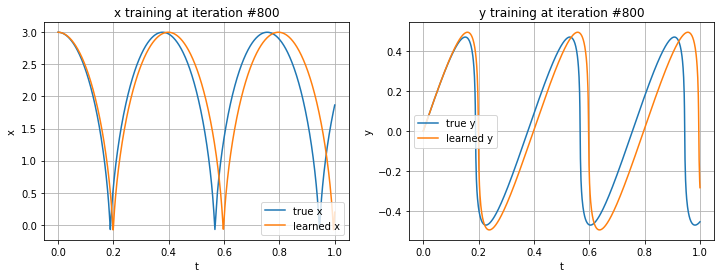

Guess of Sun 910.0049
Loss 1.6294223


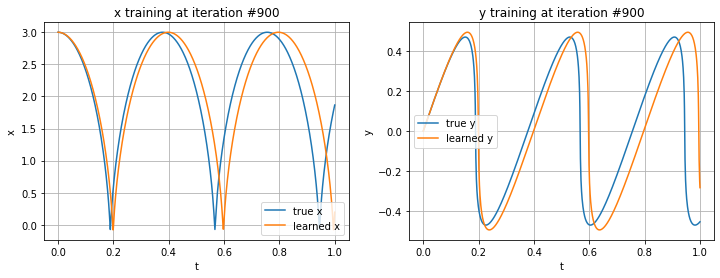

Guess of Sun 910.0049
Loss 1.6294223


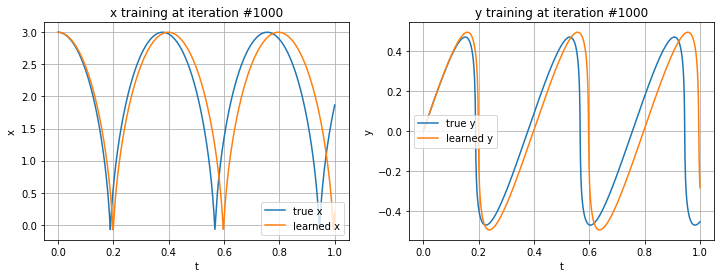

Converged Mass of Sun 910.0050659179688 after 1001 iterations with loss 1.8219146728515625


In [64]:
while np.abs(grad_ms(ms_guess)) > 0.0001:
    ms_guess -= lr_ms * grad_ms(ms_guess)
    count +=1
    
    if count > 1000:
        break
        
    if count % 100 == 0:
        cur_traj = odeint(newton_2,coord,t,ms_guess)
        position_guess = [cur_traj[:,0],cur_traj[:,2]]
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        for i, variable in enumerate(['x', 'y']):
            ax[i].plot(t, position_data[i], label=f'true {variable}')
            ax[i].plot(t, position_guess[i], label=f'learned {variable}')
            ax[i].set_xlabel('t')
            ax[i].set_ylabel(f'{variable}')
            ax[i].set_title(f'{variable} training at iteration #{count}')
            ax[i].grid()
            ax[i].legend()
        print("Guess of Sun", np.abs(ms_guess))
        print("Loss",np.abs(grad_ms(ms_guess)))
        plt.show()
    
print(f"Converged Mass of Sun {np.abs(ms_guess)} after {count} iterations with loss {np.abs(grad_ms(ms_guess))}")

## (b) Now we consider the three body system including the Sun, Uranus and Neptune. You will be given

*   A short trajectory of Uranus `orbit_data_3B.txt`. The time period within which the data is simulated is between $0$ and $0.05$.
*   Mass $m_U$. Distance from the Uranus to the Sun at the starting point $r_{U}$.

and you will predict
*   The mass of Neptune $m_N$
*   The distance from Neptune to the Sun at the starting point $r_{NS}$

More configuration of the sustem:
*   The Sun is fixed at $(0,0)$
*   The starting positions of the Uranus and the Neptune are $(r_{US}, 0)$ and $(r_{NS}, 0)$.
*   Uranus and Neptune are put quite close to each other in order for the influence between Uranus and Neptune to show up quickly.
*   In this question, the velocities are set to $\sqrt{M/r_0}$, which is the velocity of a circular orbital when feeling only the gravity from the sun. You can find it in the following code but you do not need to do any modification.

**Report your findings to Kaggle!**


In [8]:
m_U = 8.681 
m_S = 782.123 
r_US = 3.0 

The two-body Newton's equation of motion written in an `odeint` compatible form

In [9]:
#calculation of gravity
def grav(m1,m2,r):
    return m1*m2/r**2


# newtons method
def newton_3(coord,t, m_N, r_N):
    x_U = coord[:2] # x is actually x and dx/dt
    y_U = coord[2:4] # has position & velocity
    
    # neptune
    x_N = coord[4:6]
    y_N = coord[6:8]
    
    # distance to sun
    r_U = np.sqrt(x_U[0]**2+y_U[0]**2)
    r_N = np.sqrt(x_N[0]**2+y_N[0]**2)
    
    # dist neptune to uranus
    x_UN = x_N - x_U
    y_UN = y_N - y_U    
    
    #dist uranus & neptune
    r_UN = np.sqrt((x_UN[0])**2+(y_UN[0])**2)
    
    # component force acting on Uranus in x and y direction
    fx_U = -(x_U[0]/r_U)*grav(m_U, m_S, r_U) + (x_UN[0]/r_UN)*grav(m_U, m_N, r_UN)
    fy_U = -(y_U[0]/r_U)*grav(m_U, m_S, r_U) + (y_UN[0]/r_UN)*grav(m_U, m_N, r_UN) 
    
    # force on neptune in x and y direction
    fx_N = -(x_N[0]/r_N)*grav(m_N, m_S, r_N) - (x_UN[0]/r_UN)*grav(m_U, m_N, r_UN)
    fy_N = -(y_N[0]/r_N)*grav(m_N, m_S, r_N) - (y_UN[0]/r_UN)*grav(m_U, m_N, r_UN)
    
    # return velocity_x, force/mass = acceleration
    # return first order and second order derivatives
    return np.array([x_U[1], fx_U/m_U, y_U[1], fy_U/m_U, x_N[1], fx_N/m_N, y_N[1], fy_N/m_N])

def circle_v(m_center, r0):
  # get the velocity that makes a planet's orbit a sphere. 
  # It should be a save velocity for us to use to make legitimate simulation.
    return  np.sqrt(m_center/r0)

The orbit data is in the format of $(time, x_U, y_U)$ where $x$ stands for the position of Uranus.

In [10]:
import numpy as onp

In [11]:
orbit_data = onp.loadtxt('./orbit_data_2B.txt')

See that the orbit is not closed? Because it is pulled by the Neptune.
Now go get Neptune!

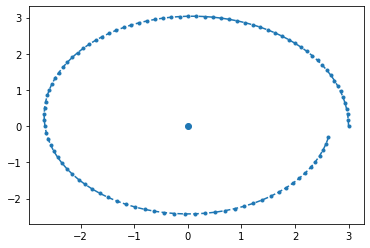

In [12]:
plt.plot(orbit_data[:,1],orbit_data[:,2],'.--')
plt.scatter([0],[0])

### Solution to (b)

In [13]:
# First Solve for Initial Conditions
# know that Ux and Uy from orbit
time = orbit_data[:,0]
x_u = orbit_data[0,1]
y_u = orbit_data[0,2]

# vx = 0 given position x non zero
vx_u = 0
vy_u = circle_v(m_S,r_US) # do not have to consider the mass of uranus

ic_u = [x_u, vx_u, y_u, vy_u]
print("Initial Conditions of Uranus", ic_u)

Initial Conditions of Uranus [3.0, 0, 0.0, DeviceArray(16.146444, dtype=float32, weak_type=True)]


In [14]:
# Initial Conditions neptune
x_n = 4.0 # based off my guess
vx_n = 0
y_n = 0
vy_n = circle_v(m_S, x_n)
ic_n = [x_n, vx_n,y_n,vy_n]
print("Guess Initial Conditions of Neptune", ic_n)

Guess Initial Conditions of Neptune [4.0, 0, 0, DeviceArray(13.983231, dtype=float32, weak_type=True)]


In [15]:
velocity_data = onp.zeros((len(time),2))

for i in range(0,len(time)-1):
    vx = circle_v(m_S,orbit_data[i,1])
    vy = circle_v(m_S,orbit_data[i,2])
    velocity_data[i] = vx,vy

<ipython-input-9-a33a45782bdc>:41: RuntimeWarning: divide by zero encountered in double_scalars
  return  np.sqrt(m_center/r0)


In [16]:
vel_u = np.nan_to_num(velocity_data)
vel_u = vel_u.at[0,1].set(0)


In [17]:
t = orbit_data[:,0]
mN_guess = 9.2 # 9.53 for kaggle
rN_guess =  4.0 # 2.0 
init_coord = np.array([3.0, 0.0, 0.0, circle_v(m_S,r_US) ,rN_guess, 0.0,0.0,circle_v(m_S,rN_guess)])

In [18]:
output = odeint(newton_3,init_coord,t,mN_guess,rN_guess)

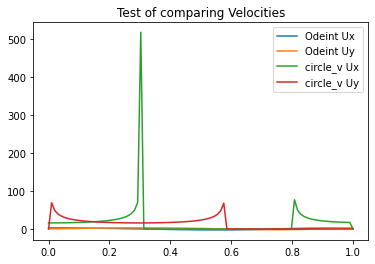

In [19]:
plt.title("Test of comparing Velocities")
plt.plot(t, output[:,0], label = "Odeint Ux")
plt.plot(t, output[:,2], label = "Odeint Uy")
plt.plot(t, vel_u[:,0], label = "circle_v Ux")
plt.plot(t, vel_u[:,1], label = "circle_v Uy")
plt.legend()
plt.show()

In [23]:
t = orbit_data[:,0]
mN_guess = 8.2 # 9.53 for kaggle
rN_guess =  4.0 # 2.0 
init_coord = np.array([3.0, 0.0, 0.0, circle_v(m_S,r_US) ,rN_guess, 0.0,0.0,circle_v(m_S,rN_guess)])

def loss(m_N, r_N): # comparing velocity data of uranus because thats all we have
    return np.sum((odeint(newton_3,init_coord,t,m_N,r_N)[:,0].reshape(-1) - vel_u[:,0].reshape(-1))**2 + \
                  ((odeint(newton_3,init_coord,t,m_N,r_N)[:,2].reshape(-1) - vel_u[:,1].reshape(-1))**2))

In [24]:
grad_mN = jit(grad(loss,0))
grad_rN = jit(grad(loss,1))

lr_mN = 0.002
lr_rN = 0.003
count = 0


Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


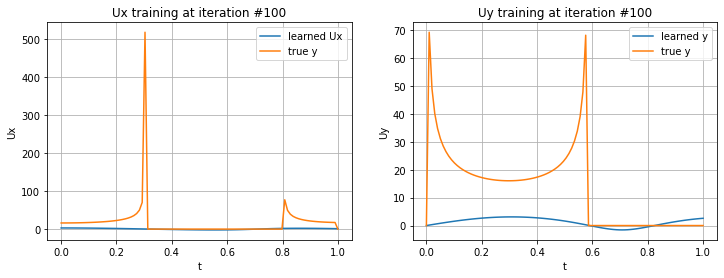

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


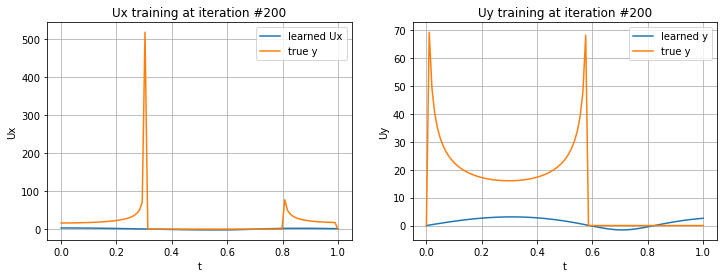

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


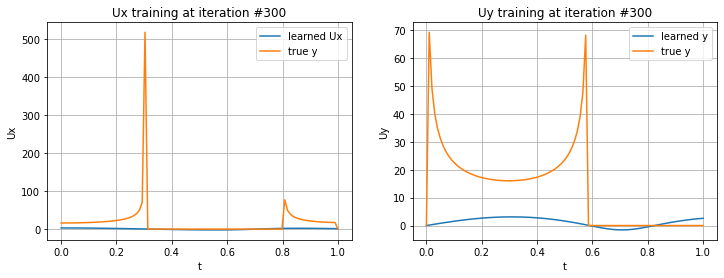

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


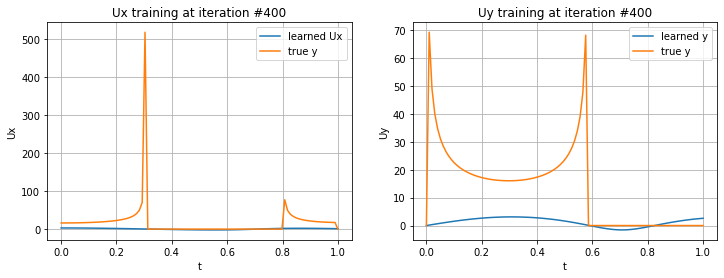

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


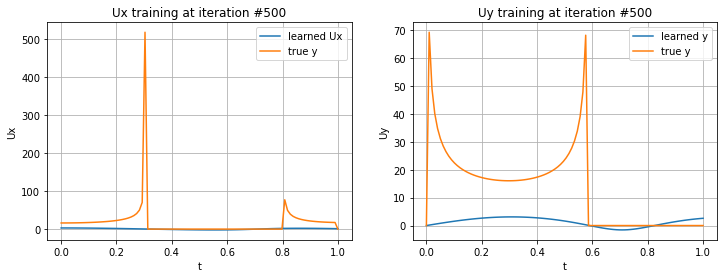

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


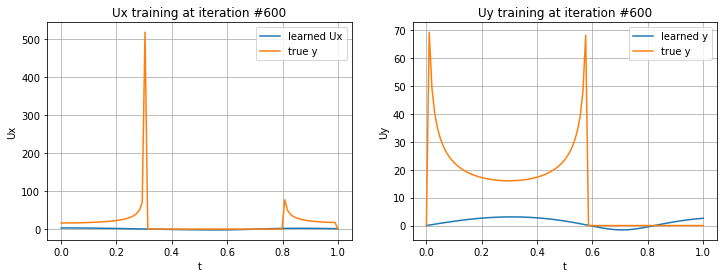

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


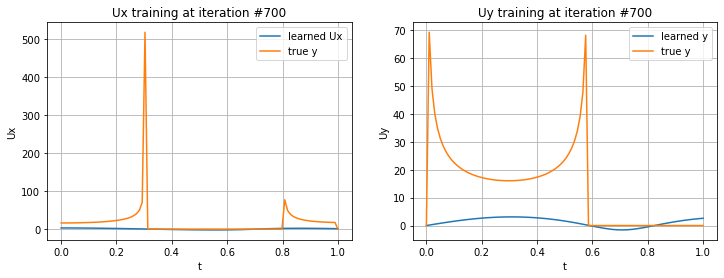

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


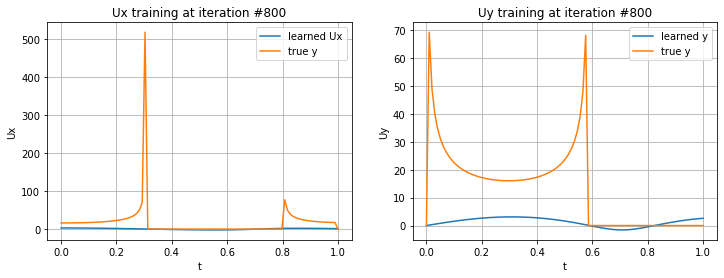

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


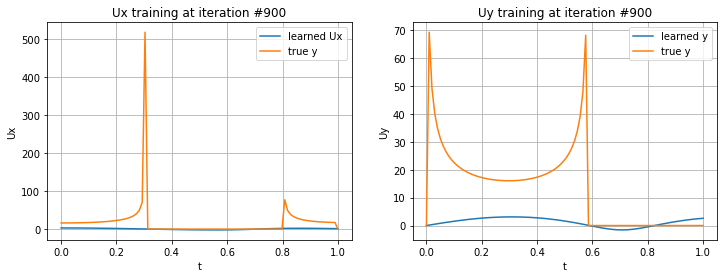

Loss Neptune Mass 0.001832962
Loss Start Position of Neptune 0.0


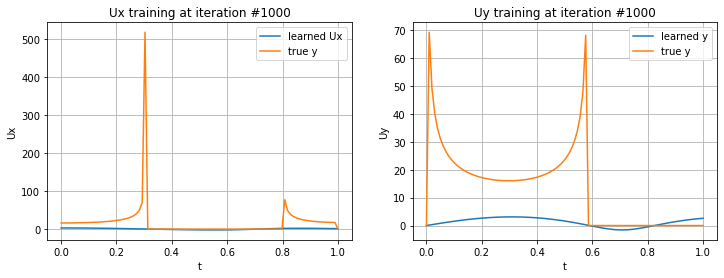

In [25]:
while np.abs(grad_mN(mN_guess,rN_guess)) > 1e-3:
    mN_guess -= lr_mN * grad_mN(mN_guess,rN_guess)
    rN_guess -= lr_rN * grad_rN(mN_guess,rN_guess)
    
    count +=1
    if count > 1000:
        break
        
    if count % 100 == 0:
        cur_traj = odeint(newton_3,init_coord,t,mN_guess,rN_guess)
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        ax[0].plot(t, cur_traj[:,0], label=f'learned Ux')
        ax[0].plot(t,vel_u[:,0], label=f'true {variable}')
        ax[0].set_xlabel('t')
        ax[0].set_ylabel(f'Ux')
        ax[0].set_title(f'Ux training at iteration #{count}')
        ax[0].grid()
        ax[0].legend()
        
        ax[1].plot(t, cur_traj[:,2], label=f'learned {variable}')
        ax[1].plot(t,vel_u[:,1], label=f'true {variable}')
        ax[1].set_xlabel('t')
        ax[1].set_ylabel(f'Uy')
        ax[1].set_title(f'Uy training at iteration #{count}')
        ax[1].grid()
        ax[1].legend()
        
        print("Loss Neptune Mass",np.abs(grad_mN(mN_guess,rN_guess)))
        print("Loss Start Position of Neptune",np.abs(grad_rN(mN_guess,rN_guess)))
        plt.show()

In [26]:
print(f"Converged value for Mass of Neptune {np.abs(mN_guess)}")
print("Converged Loss Neptune Mass:",np.abs(grad_mN(mN_guess,rN_guess)))
print(f"Converged value for starting Position of Neptune {np.abs(rN_guess),0}")
print(f"This took {count} iterations")

Converged value for Mass of Neptune 11.992232322692871
Converged Loss Neptune Mass: 0.0018577576
Converged value for starting Position of Neptune (DeviceArray(4., dtype=float32), 0)
This took 1001 iterations
